Logistic Regression or Multiclass Classification is an extension of Binomial Logistic Regression which is used to model nominal outcome variables.

First We Import all the necessary libraries as pandas, numpy, matplotlib.pyplot, seaborn, roc_curve, auc, metrics etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc


In [2]:
#importing csv file
from google.colab import files
uploaded = files.upload()

Saving bike_buyers_clean.csv to bike_buyers_clean.csv


In [3]:
#importing data in pandas
import io
dataframe2 = pd.read_csv(io.BytesIO(uploaded['bike_buyers_clean.csv']))
#loading data
#dataframe2 = dataframe2.drop(labels = range(550,1000), axis  =0)
dataframe2

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


In [4]:
#showing top 5 dataset
dataframe2.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [5]:
print("The number of rows and column:- ", dataframe2.shape)

The number of rows and column:-  (1000, 13)


In [6]:
from sklearn.preprocessing import StandardScaler
ash = StandardScaler()
dataframe2.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [7]:
dataframe2 = dataframe2.dropna()

In [8]:
dataframe2

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No


## 2. Data Understanding

The data presented above explains the situation of buying a person buys a bike or not. Here bike is the dependent variable and ID, Marital Status, Gender, Income, HomeOwner, Cars, Age, Children, Occupation, Region,etc are the independent varibales. And for the classification task I have used the following varibales:-
1. Income
2. Children
3. Cars
4. Age
5. Marital Status
6. Gender
7. Occupation
8. Region 

# 3. Data Analysis

In [10]:
data_a = dataframe2[['ID','Marital Status',	'Gender',	'Income',	'Children',	'Education',	'Occupation',	'Home Owner',	'Cars',	'Commute Distance',	'Region',	'Age','Purchased Bike']]


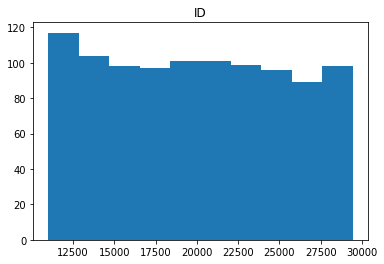

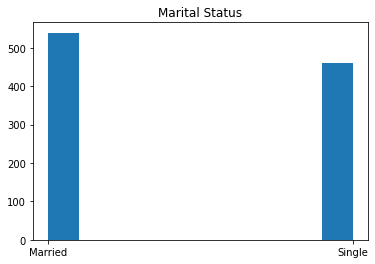

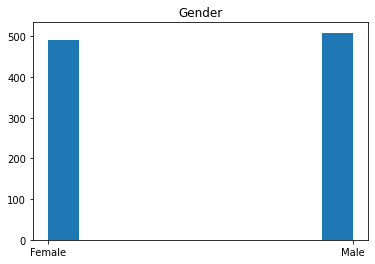

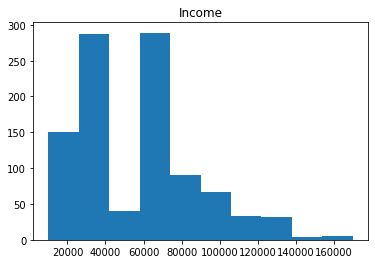

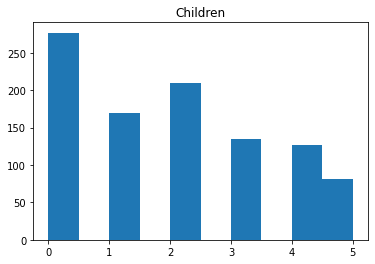

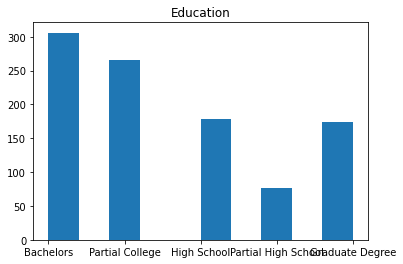

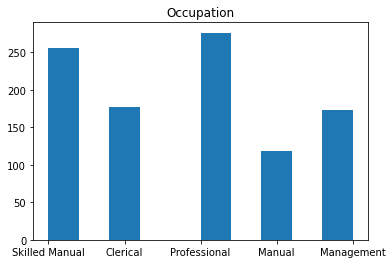

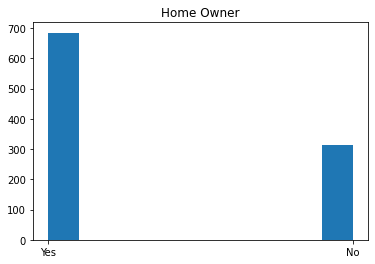

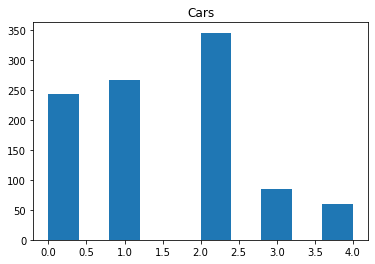

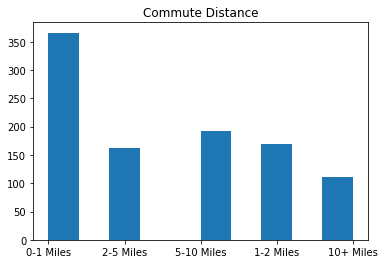

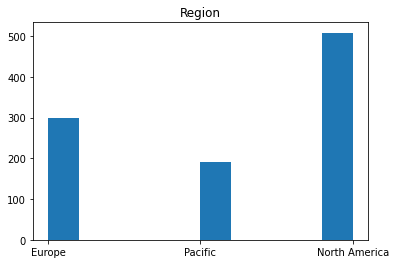

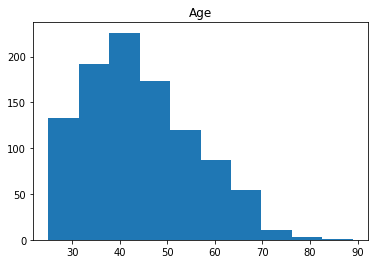

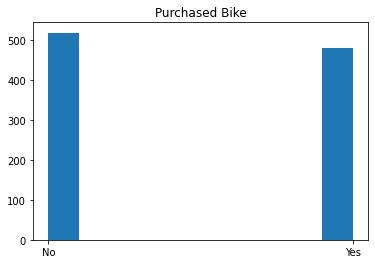

In [11]:
for i in dataframe2.columns:
  plt.hist(data_a[i])
  plt.title(i)
  plt.show()
  

In [12]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 109.4+ KB


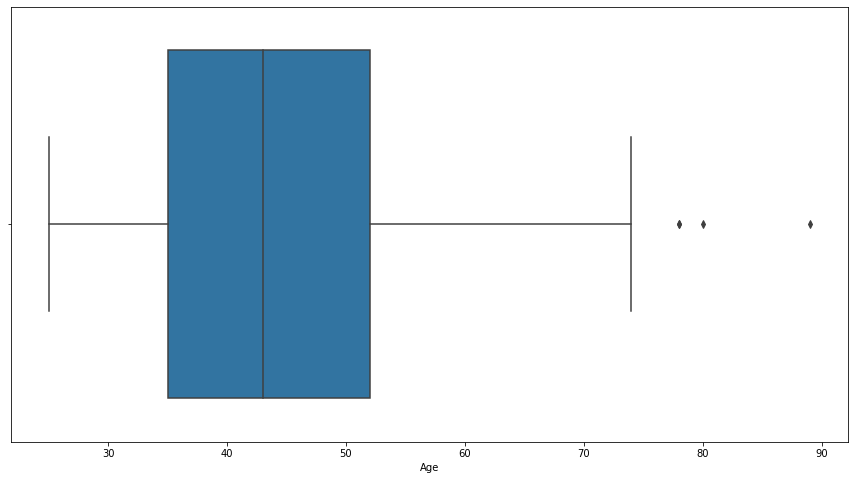

In [13]:
fig, axs = plt.subplots( figsize=(15, 8))
sns.boxplot(x = dataframe2['Age'])
plt.show()

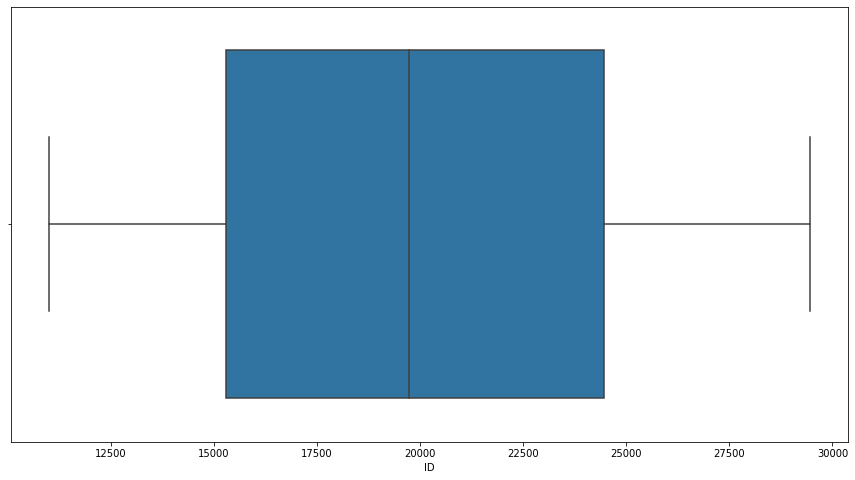

In [14]:
fig, axs = plt.subplots( figsize=(15, 8))
sns.boxplot(x = dataframe2['ID'])
plt.show()

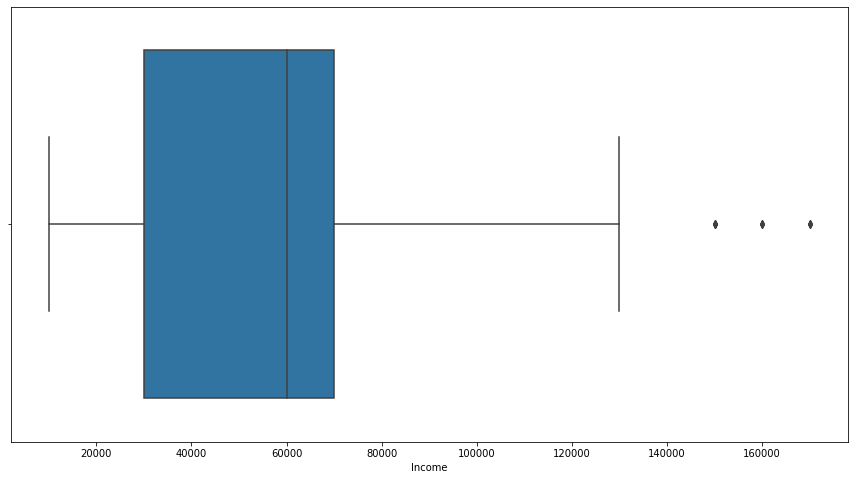

In [15]:
fig, axs = plt.subplots( figsize=(15, 8))
sns.boxplot(x = dataframe2['Income'])
plt.show()

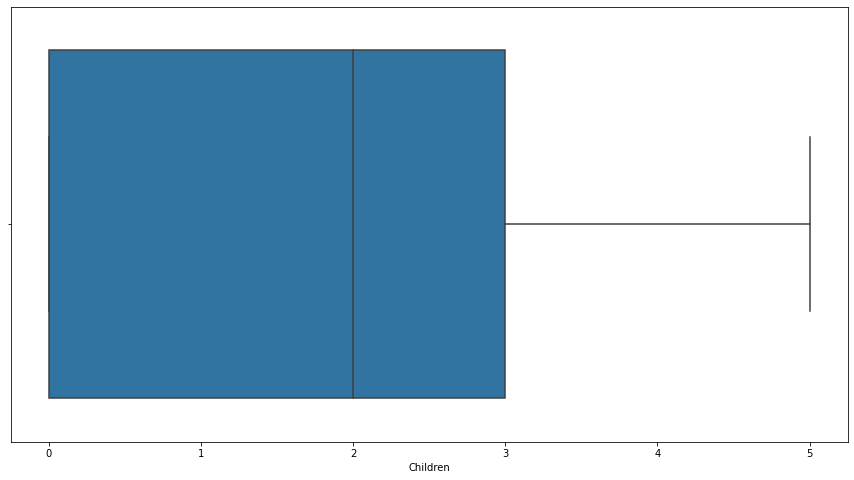

In [16]:
fig, axs = plt.subplots( figsize=(15, 8))
sns.boxplot(x = dataframe2['Children'])
plt.show()

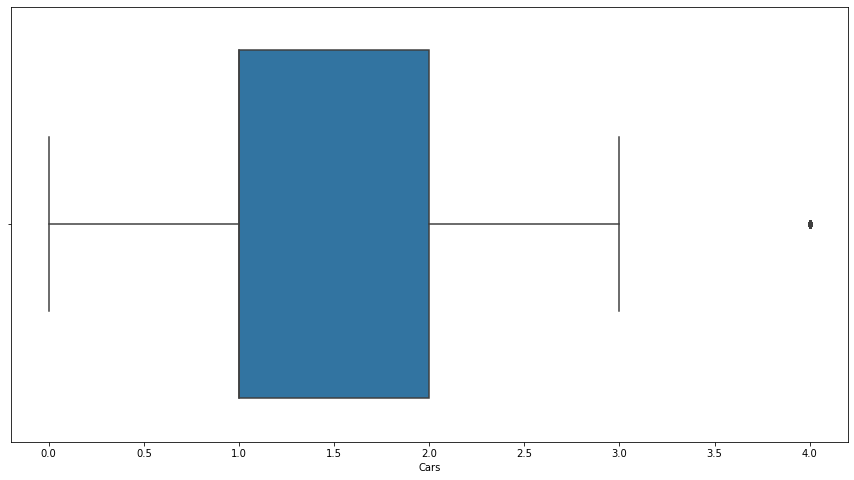

In [17]:
fig, axs = plt.subplots( figsize=(15, 8))
sns.boxplot(x = dataframe2['Cars'])
plt.show()

# 4. Logistics Regression

In [18]:
#importing libraries for regression task
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
le = LabelEncoder()

In [20]:
dataframe2['mar'] = le.fit_transform(dataframe2['Marital Status'])
dataframe2


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,mar
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No,0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No,0
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No,0
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes,1
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes,0
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes,1
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes,0
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No,1


In [21]:
#transforming string data into integer type using Label Encoder Fit transform
dataframe2['gender'] = le.fit_transform(dataframe2['Gender'])
dataframe2['occp'] = le.fit_transform(dataframe2['Occupation'])
dataframe2['reg'] = le.fit_transform(dataframe2['Region'])
dataframe2['bike'] = le.fit_transform(dataframe2['Purchased Bike'])

In [22]:
dataframe2

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,mar,gender,occp,reg,bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No,0,0,4,0,0
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No,0,1,0,0,0
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No,0,1,3,0,0
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes,1,1,3,2,1
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000,2,High School,Professional,Yes,2,2-5 Miles,North America,54,Yes,0,1,3,1,1
996,28672,Single,Male,70000,4,Graduate Degree,Professional,Yes,0,2-5 Miles,North America,35,Yes,1,1,3,1,1
997,11809,Married,Male,60000,2,Bachelors,Skilled Manual,Yes,0,0-1 Miles,North America,38,Yes,0,1,4,1,1
998,19664,Single,Male,100000,3,Bachelors,Management,No,3,1-2 Miles,North America,38,No,1,1,1,1,0


In [23]:
#taking only int datatype
data = dataframe2[['Income','Children','Cars','Age','mar','gender','occp','reg','bike']]
data

,Income,Children,Cars,Age,mar,gender,occp,reg,bike
0,40000,1,0,42,0,0,4,0,0
1,30000,3,1,43,0,1,0,0,0
2,80000,5,2,60,0,1,3,0,0
3,70000,0,1,41,1,1,3,2,1
4,30000,0,0,36,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...
995,60000,2,2,54,0,1,3,1,1
996,70000,4,0,35,1,1,3,1,1
997,60000,2,0,38,0,1,4,1,1
998,100000,3,3,38,1,1,1,1,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Income    1000 non-null   int64
 1   Children  1000 non-null   int64
 2   Cars      1000 non-null   int64
 3   Age       1000 non-null   int64
 4   mar       1000 non-null   int64
 5   gender    1000 non-null   int64
 6   occp      1000 non-null   int64
 7   reg       1000 non-null   int64
 8   bike      1000 non-null   int64
dtypes: int64(9)
memory usage: 78.1 KB


In [25]:
x = data[['Income','Children','Cars','Age','mar','gender','occp','reg']]
y = data['bike']

In [26]:
x

,Income,Children,Cars,Age,mar,gender,occp,reg
0,40000,1,0,42,0,0,4,0
1,30000,3,1,43,0,1,0,0
2,80000,5,2,60,0,1,3,0
3,70000,0,1,41,1,1,3,2
4,30000,0,0,36,1,1,0,0
...,...,...,...,...,...,...,...,...
995,60000,2,2,54,0,1,3,1
996,70000,4,0,35,1,1,3,1
997,60000,2,0,38,0,1,4,1
998,100000,3,3,38,1,1,1,1


In [27]:
y

0      0
1      0
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: bike, Length: 1000, dtype: int64

In [28]:
#Using train test split ro predict the accuracy
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Train Data: {X_test.shape}, {y_test.shape}")

Train Data: (900, 8), (900,)
Train Data: (100, 8), (100,)


In [29]:
logistic_class = LogisticRegression()
logistic_class.fit(X_train, y_train)

prediction_2 = logistic_class.predict(X_test)

In [30]:

print(f"Accuracy of the classifier test is: {accuracy_score(y_test, prediction_2)}")

Accuracy of the classifier test is: 0.65


In [31]:
print(f"Precision Score of the classifier 1 is: {precision_score(y_test, prediction_2)}")

Precision Score of the classifier 1 is: 0.6491228070175439


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_2))

              precision    recall  f1-score   support

           0       0.65      0.58      0.62        48
           1       0.65      0.71      0.68        52

    accuracy                           0.65       100
   macro avg       0.65      0.65      0.65       100
weighted avg       0.65      0.65      0.65       100



Precision is a metric which should be used if false negative is not that big of a problem for us. It can be
calculated by the formula TP/(TP+FP). When the model predicts correct, how often is it correct is given by precision.
In an imbalanced classification problem with more than two classes, precision is calculated as the sum of true
positives across all classes divided by the sum of true positives and false positives across all classes. For the bike purchase to be true,
the precision is found to be 0.65, that means when the model predicted the bike purchase, it was right 65% of
time.

Recall is a metric which should be used if false negative is a very big problem for us and need to reduce it to
the lowest point possible. In an imbalanced classification problem with more than two classes, recall is calculated as
the sum of true positives across all classes divided by the sum of true positives and false negatives across all classes.


f1-score is a weighted average of the true positive rate and precision. For a high F score, it is important to have a
high precision and recall value. Sometimes, when the precion is high, recall is low and vice versa. In such condition,
we have to calculate f-score i.e The harmonic mean. If we calculate arithemetic mean, the result would be very far
from the what it should have been. It is also called f1 score. Its formula simplified is: 2

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction_2)
print(cm)

[[28 20]
 [15 37]]


For visual preference, a heatmap is made from the seaborn library and the same confusion matrix is sent to it along
with the labels.


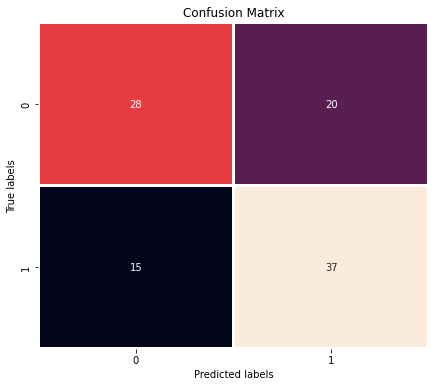

In [34]:
plt.figure(figsize = (7,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidth=2.5, ax = ax, cbar=False); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(y.unique()); ax.yaxis.set_ticklabels(y.unique());

ROC Curve is the metric we use to find the threshold in our logistic regression model. We can say that it is used to
calculate the performance of a binary classifier. It is a probability curve that plots the TPR against FPR at various
threshold values. We generally use 0.5 as the threshold i.e. anyhing greater than 0.5 and itself will be classified as 1
and anything less that that will be classified at 0. This is not always a good threshold. Sometimes we may want higher
True Positive Rate and very less False Positive Rate and other times we might want Very High True Positive Rate and
not care too much about false Positive rate. This can be determined by the ROC curve. AUC is just the area under the
curve. This is used as a summary of ROC curve. The higher the AUC, the better the performance of the model at
distinguishing between the positive and negative classes.


AUC for our classifier is: 0.7151442307692307


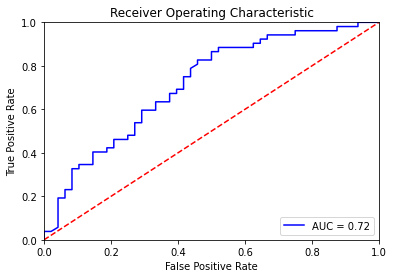

In [35]:
class_probabilities = logistic_class.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()